# Funcion de Coherencia

## Scratch Implementation

Implementacion de codigo siguiendo la ecuacion

- [Link](https://resources.system-analysis.cadence.com/blog/msa2020-cross-power-spectral-density-spectrum-for-noise-modelling-and-filter-design)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft

2048


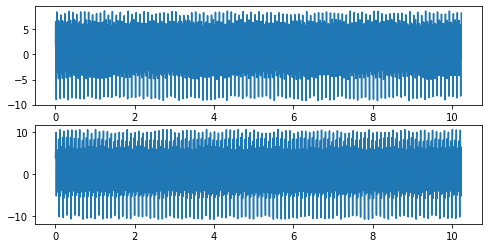

In [72]:
# Creacion de las señales de prueba

Fs = 200

t = np.arange(0,10.24,1/Fs)

x1 =  3*np.sin(2*np.pi*40*t) + np.random.rand(len(t))
x2 =  4*np.sin(2*np.pi*40*t) + np.random.rand(len(t))

x1 = 5*np.sin(2*np.pi*90*t) + 3*np.sin(2*np.pi*40*t) + 2*np.cos(2*np.pi*30*t) + np.random.rand(len(t))
x2 = 3*np.cos(2*np.pi*90*t) + 4*np.sin(2*np.pi*40*t) + 5*np.sin(2*np.pi*30*t) + np.random.rand(len(t))

N = len(t)
print(N)

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(t,x1)
plt.subplot(2,1,2)
plt.plot(t,x2)

### FFT Calculation

Calculo de la transformada de Fourier usando ventanas (Hamming)

- link [ventanas](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hamming.html)
- Link [Uso de ventana](https://flothesof.github.io/FFT-window-properties-frequency-analysis.html)

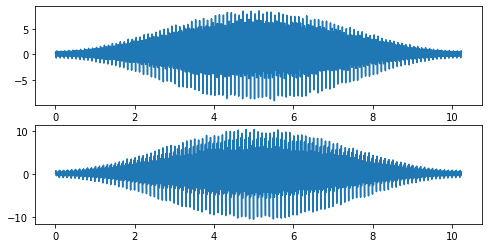

In [73]:
# Influencia de la ventana

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(t,x1*signal.get_window('hamming',len(x1)))
plt.subplot(2,1,2)
plt.plot(t,x2*signal.get_window('hamming',len(x1)))

In [112]:
# FFT de las dos señales

# X1n = fft(x1)
# X2n = fft(x2)

L = N

X1n = fft(x1*signal.get_window('hamming',len(x1)), n = L)
X2n = fft(x2*signal.get_window('hamming',len(x2)), n = L)

X1n_ = np.array(X1n[0:int(L/2)])
X2n_ = np.array(X2n[0:int(L/2)])


### Calculo del periodograma

Para el periodograma se utiliza la siguiente ecuacion

$P_{xx}(f) = \frac{1}{F_s N} |X(f)|^2$

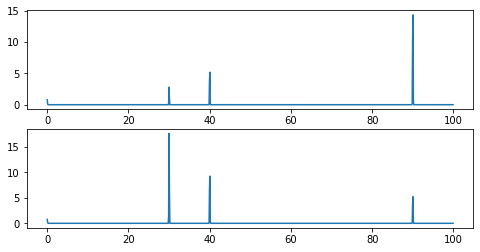

In [113]:
Pxx = (1/(Fs*L))*(np.abs(X1n_)**2)
Pyy = (1/(Fs*L))*(np.abs(X2n_)**2)

freq = Fs*np.arange(0,(L/2))/L

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(freq,Pxx)
plt.subplot(2,1,2)
plt.plot(freq,Pyy)

### Calculo del periodograma cruzado

Para el periodograma cruzado se utiliza la siguiente ecuacion

$P_{xy}(f) = F\{R_{xy}(m)\}= \sum_{m=-\infty}^{\infty}{R_{xy}(m)e^{-jwm}} $

donde $R_{xy}$ es la correlacion cruzada de las señales

$R_{xy}(\tau)=\lim_{T\to\infty}{\frac{1}{T}\int_{0}^{T}{x(t)y(t-\tau)dt}}$



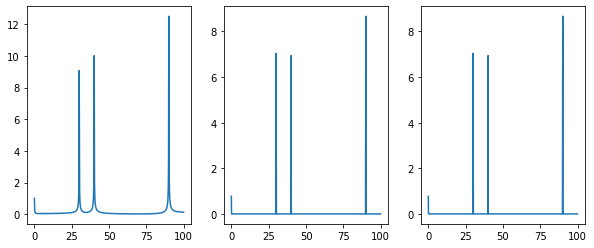

In [114]:
Rxy = signal.correlate(x1, x2, mode = 'full', method = 'direct')
# Pxy = fft(Rxy)
Pxy = fft(Rxy*signal.get_window('hamming',len(Rxy)), n = L )
Pxy_1 = (1/(Fs*L))*np.abs(Pxy[0:int(L/2)])

plt.figure(figsize=(10, 4))
plt.subplot(1,3,1)
plt.plot(freq, np.abs(Pxy_1))

Pxy = X1n*np.conj(X2n)
Pxy_2 = (1/(Fs*L))*(np.abs(Pxy[0:int(L/2)]))

plt.subplot(1,3,2)
plt.plot(freq,np.abs(Pxy_2))

Pxy_3 = (1/(Fs*L))*(np.abs(X1n_*X2n_))

plt.subplot(1,3,3)
plt.plot(freq,np.abs(Pxy_3))

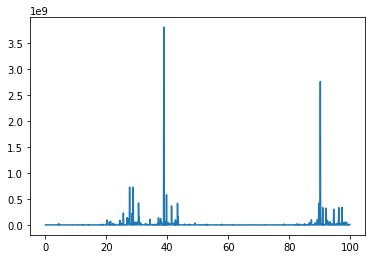

In [115]:
mscohere = (np.abs(Pxy_1)**2)/(Pxx*Pyy)

plt.plot(freq,mscohere)

### Using periodogram



(257,)

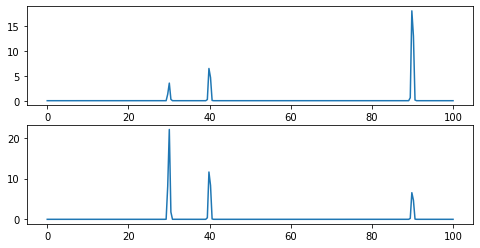

In [25]:
freq, Px1 = signal.welch(x1, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)
freq, Px2 = signal.welch(x2, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(freq,Px1)
plt.subplot(2,1,2)
plt.plot(freq,Px2)


C:\Users\fabian\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


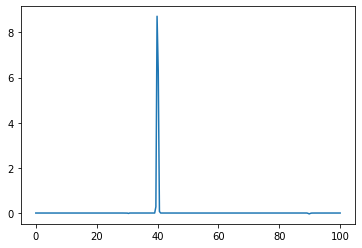

In [37]:
freq, Px1x2 = signal.csd(x1, x2, Fs, window = 'hamming', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=-1)

plt.plot(freq, Px1x2)

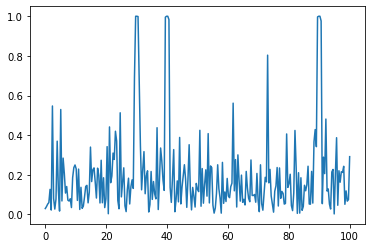

In [38]:
coher = (np.abs(Px1x2)**2)/(Px1*Px2)

plt.plot(freq, coher)